# Tensorflow--梯度
### 梯度
Tensorflow通过函数gradients(ys,xs,grad_ys=None,name="gradients")实现自动计算梯度，代码如下：

In [3]:
import tensorflow as tf
import numpy as np

x=tf.placeholder(tf.float32,(2,1))

w=tf.constant([[3,4]],tf.float32)
y=tf.matmul(w,x)

F=tf.pow(y,2)

grades=tf.gradients(F,x)
session=tf.Session()

print(session.run(grades,{x:np.array([[2],[3]])}))


[array([[ 108.],
       [ 144.]], dtype=float32)]


### 导数计算的链式法则
#### 梯度下降法
#### 一元函数的梯度下降法
梯度下降法是求解凸函数无约束最优化问题常用的方法，其中η常称为学习率
求：f(x)=(x-1)^2的最小值点

初始化：x1=4,η=0.25
第一次迭代：x2=x1-ηf(x1)=4-0.25*2*(4-1)=2.5
第二次迭代：x3=x2-ηf(x2)=2.5-0.25*2*(2.5-1)=1.75
第三次迭代：x4=x3-ηf(x3)=1.75-0.25*2*(1.75-1)=1.375

Tensorflow通过函数tf.train.GradientDescentOptimizer(learning_rate,use_locking=False,name="GradientDescent")实现以上梯度下降法，利用该函数实现以上示例的迭代过程

In [4]:
import tensorflow as tf

x=tf.Variable(4.0,dtype=tf.float32)

y=tf.pow(x-1,2.0)

# 梯度下降，学习率设置为0.25
opti=tf.train.GradientDescentOptimizer(0.25).minimize(y)

session=tf.Session()
session.run(tf.global_variables_initializer())

# 三次迭代
for i in range(3):
    session.run(opti)
    
    print(session.run(x))
    
    

2.5
1.75
1.375


其中学习率η=0.25设置得比较大，最好设置得小一点，否则会在最小值附近震荡，稍微修改以上程序，令学习率η=0.05，迭代100次，每次打印当前寻找的点

第1次的x的迭代值：13.600000
第11次的x的迭代值：5.393349
第21次的x的迭代值：2.531866
第31次的x的迭代值：1.534129
第41次的x的迭代值：1.186239
第51次的x的迭代值：1.064938
第61次的x的迭代值：1.022642
第71次的x的迭代值：1.007895
第81次的x的迭代值：1.002753
第91次的x的迭代值：1.000960


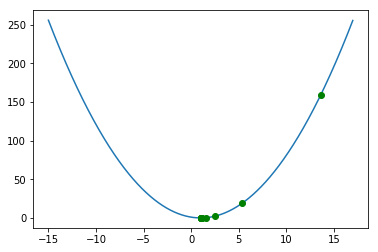

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math

x=tf.Variable(15.0,dtype=tf.float32)

y=tf.pow(x-1,2.0)

opti=tf.train.GradientDescentOptimizer(0.05).minimize(y)

value=np.arange(-15,17,0.01)

y_value=np.power(value-1,2.0)
plt.plot(value,y_value)

session=tf.Session()
session.run(tf.global_variables_initializer())

for i in range(100):
    session.run(opti)
    
    if(i%10==0):
        v=session.run(x)
        plt.plot(v,math.pow(v-1,2.0),"go")
        print("第%d次的x的迭代值：%f"%(i+1,v))
        
plt.show()

#### 多元函数的梯度下降法
f(x1,x2)=x1^2+x2^2

In [8]:
import tensorflow as tf

x1=tf.Variable(-4.0,dtype=tf.float32)
x2=tf.Variable(4.0,dtype=tf.float32)

y=tf.square(x1)+tf.square(x2)

session=tf.Session()
session.run(tf.global_variables_initializer())

opti=tf.train.GradientDescentOptimizer(0.25).minimize(y)

for i in range(2):
    session.run(opti)
    
    print((session.run(x1),session.run(x2)))

(-2.0, 2.0)
(-1.0, 1.0)


#### 采用矩阵的形式组织变量

In [10]:
import tensorflow as tf

x=tf.Variable(tf.constant([-4,4],tf.float32),tf.float32)

y=tf.reduce_sum(tf.square(x))

session=tf.Session()
session.run(tf.global_variables_initializer())

opti=tf.train.GradientDescentOptimizer(0.25).minimize(y)

for i in range(2):
    session.run(opti)
    
    print(session.run(x))

[-2.  2.]
[-1.  1.]


利用Tensorflow对某一函数进行梯度下降，主要分为如下三步：
1.利用Variable类初始化自变量的值
2.构造出函数
3.利用函数GradientDescentOptimizer进行梯度下降法操作

### 梯度下降法
#### Adagrad法
f(x1,x2)=x1^2+2*x2^2

Tensorflow通过函数tf.train.AdagradOptimizer(learning_rate=0.001,initial_accumulator_value=0.1)实现Adagrad梯度下降

In [11]:
import tensorflow as tf

x=tf.Variable(tf.constant([[4],[3]],tf.float32),dtype=tf.float32)

w=tf.constant([[1,2]],tf.float32)
y=tf.reduce_sum(tf.matmul(w,tf.square(x)))

opti=tf.train.AdagradOptimizer(0.25,0.1).minimize(y)

session=tf.Session()
init=tf.global_variables_initializer()
session.run(init)

for i in range(3):
    session.run(opti)
    
    print(session.run(x))

[[ 3.75019503]
 [ 2.75008678]]
[[ 3.57927608]
 [ 2.58118463]]
[[ 3.4426589 ]
 [ 2.44730377]]


[[ 3.62800765]
 [ 2.6001389 ]]
[[ 3.37010479]
 [ 2.33821058]]
[[ 3.1645782 ]
 [ 2.13524342]]


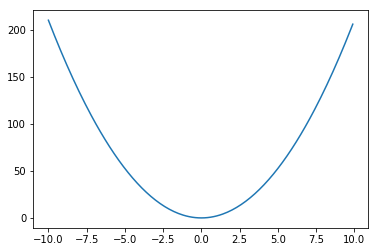

In [4]:
# -*- coding:utf-8 -*-
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math

# 初始化变量x的值
x=tf.Variable(tf.constant([[4],[3]],tf.float32),dtype=tf.float32)
w=tf.constant([[0.1,2]],tf.float32)
y=tf.reduce_sum(tf.matmul(w,tf.square(x)))

value1=np.arange(-10,10,0.1)
value2=np.arange(-10,10,0.1)
y_value=0.1*np.power(value1,2.0)+2.0*np.power(value2,2.0)
plt.plot(value1,)

# Adagrad梯度下降
opti=tf.train.AdagradOptimizer(0.4,0.1).minimize(y)
session=tf.Session()
init=tf.global_variables_initializer()
session.run(init)

for i in range(3):
    session.run(opti)
    print(session.run(x))
    
plt.show()

#### Momentum法

In [12]:
import tensorflow as tf

x=tf.Variable(tf.constant([[4],[3]],tf.float32),dtype=tf.float32)

w=tf.constant([[1,2]],tf.float32)
y=tf.reduce_sum(tf.matmul(w,tf.square(x)))

opti=tf.train.MomentumOptimizer(0.01,0.9).minimize(y)

session=tf.Session()
init=tf.global_variables_initializer()
session.run(init)

for i in range(2):
    session.run(opti)
    
    print(session.run(x))

[[ 3.92000008]
 [ 2.88000011]]
[[ 3.76960015]
 [ 2.65680003]]


#### NAG法

In [ ]:
Tensorflow通过函数MomentumOptimizer实现Momentum法，该函数中有一个参数use_nesterov，只要将该参数设置为True，就是Tensorflow实现的NAG法

In [13]:
import tensorflow as tf

x=tf.Variable(tf.constant([[4],[3]],tf.float32),dtype=tf.float32)

w=tf.constant([[1,2]],tf.float32)
y=tf.reduce_sum(tf.matmul(w,tf.square(x)))

opti=tf.train.MomentumOptimizer(0.01,0.9,use_nesterov=True).minimize(y)

session=tf.Session()
init=tf.global_variables_initializer()
session.run(init)

for i in range(2):
    session.run(opti)
    
    print(session.run(x))

[[ 3.84800005]
 [ 2.77200007]]
[[ 3.636976  ]
 [ 2.46412802]]


#### RMSprop法
Tensorflow的实现代码如下：

In [ ]:
opti=tf.train.RMSPropOptimizer(learning_rate=0.01,decay=0.9,epsilon=1e-10).minimize(y)

In [17]:
import tensorflow as tf

x=tf.Variable(tf.constant([[4],[3]],tf.float32),dtype=tf.float32)

w=tf.constant([[1,2]],tf.float32)
y=tf.reduce_sum(tf.matmul(w,tf.square(x)))

opti=tf.train.RMSPropOptimizer(learning_rate=0.01,decay=0.9,epsilon=1e-10).minimize(y)

session=tf.Session()
init=tf.global_variables_initializer()
session.run(init)

for i in range(2):
    session.run(opti)
    
    print(session.run(x))

[[ 3.97039056]
 [ 2.96932149]]
[[ 3.94826055]
 [ 2.94682598]]


#### 具备动量的RMSprop法是RMSprop和Momentum结合的方法
Tensorflow的实现代码如下：

In [ ]:
tf.train.RMSPropOptimizer(learning_rate=0.01,decay=0.9,momentum=0.9,epsilon=1e-10).minimize(y)

In [20]:
import tensorflow as tf

x=tf.Variable(tf.constant([[4],[3]],tf.float32),dtype=tf.float32)

w=tf.constant([[1,2]],tf.float32)
y=tf.reduce_sum(tf.matmul(w,tf.square(x)))

opti=tf.train.RMSPropOptimizer(learning_rate=0.01,decay=0.9,momentum=0.9,epsilon=1e-10).minimize(y)

session=tf.Session()
init=tf.global_variables_initializer()
session.run(init)

for i in range(2):
    session.run(opti)
    
    print(session.run(x))

[[ 3.97039056]
 [ 2.96932149]]
[[ 3.92161226]
 [ 2.91921544]]


#### Adadelta法
Tensorflow通过函数：

In [ ]:
tf.train.AdadeltaOptimizer(learning_rate=0.001,rho=0.95,epsilon=1e-8).minimize(y)

In [21]:
import tensorflow as tf

x=tf.Variable(tf.constant([[4],[3]],tf.float32),dtype=tf.float32)

w=tf.constant([[1,2]],tf.float32)
y=tf.reduce_sum(tf.matmul(w,tf.square(x)))

opti=tf.train.AdadeltaOptimizer(learning_rate=0.001,rho=0.95,epsilon=1e-8).minimize(y)

session=tf.Session()
init=tf.global_variables_initializer()
session.run(init)

for i in range(2):
    session.run(opti)
    
    print(session.run(x))

[[ 3.99999928]
 [ 2.99999928]]
[[ 3.99999881]
 [ 2.99999881]]


#### Adam法

In [ ]:
tf.train.AdamOptimizer(learning_rate=0.001,beta1=0.9,beta2=0.999,epsilon=1e-8)

In [22]:
import tensorflow as tf

x=tf.Variable(tf.constant([[4],[3]],tf.float32),dtype=tf.float32)

w=tf.constant([[1,2]],tf.float32)
y=tf.reduce_sum(tf.matmul(w,tf.square(x)))

opti=tf.train.AdamOptimizer(learning_rate=0.001,beta1=0.9,beta2=0.999,epsilon=1e-8).minimize(y)

session=tf.Session()
init=tf.global_variables_initializer()
session.run(init)

for i in range(2):
    session.run(opti)
    
    print(session.run(x))

[[ 3.99900007]
 [ 2.99900007]]
[[ 3.99800014]
 [ 2.99800014]]
